In [26]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import math
import numpy as np

params = {
    'legend.fontsize': 16,
    'legend.handlelength': 3,
    'legend.loc': 'upper center',
    'legend.markerscale': 1.5,
    'legend.edgecolor': 'black',
    'legend.borderaxespad': 0,
    'font.size': 20,
    'font.family': 'DeJavu Serif',
    'font.serif': ['Times New Roman'],
    'xtick.labelsize':'small',
    'ytick.labelsize':'small',
    'lines.markersize': 15,
    'axes.linewidth': 1.8
}
plt.rcParams.update(params)

In [ ]:
# 'LightGCN': 0.2744, 'SGL': 0.2783, 'DHCF': 0.2553, 'SHT': 0.2773, 'HCCF': 0.2365, 'KGAT': 0.2372, 'KGIN': 0.2989, 'KGCL': 0.3089, 'KGRec': 0.3082, 'KHGRec': 0.31803
#  {'LightGCN': 0.2548, 'SGL': 0.2494, 'DHCF': 0.2553, 'SHT': 0.242, 'HCCF': 0.3183, 'KGAT': 0.2707, 'KGIN': 0.2989, 'KGCL': 0.3165, 'KGRec': 0.3053, 'KHGRec': 0.3319}
#  data_ndcg = {
#     'LastFM': {'LightGCN': 0.2472, 'SGL': 0.2502, 'DHCF': 0.2311, 'SHT': 0.2517, 'HCCF': 0.2008, 'KGAT': 0.1574, 'KGIN': 0.2064, 'KGCL': 0.2424, 'KGRec': 0.2514, 'KHGRec': 0.2705},
#     'ML-1M': {'LightGCN': 0.1813, 'SGL': 0.1788, 'DHCF': 0.1963, 'SHT': 0.176, 'HCCF': 0.2309, 'KGAT': 0.1865, 'KGIN': 0.2064, 'KGCL': 0.2243, 'KGRec': 0.2187, 'KHGRec': 0.2412}
# }

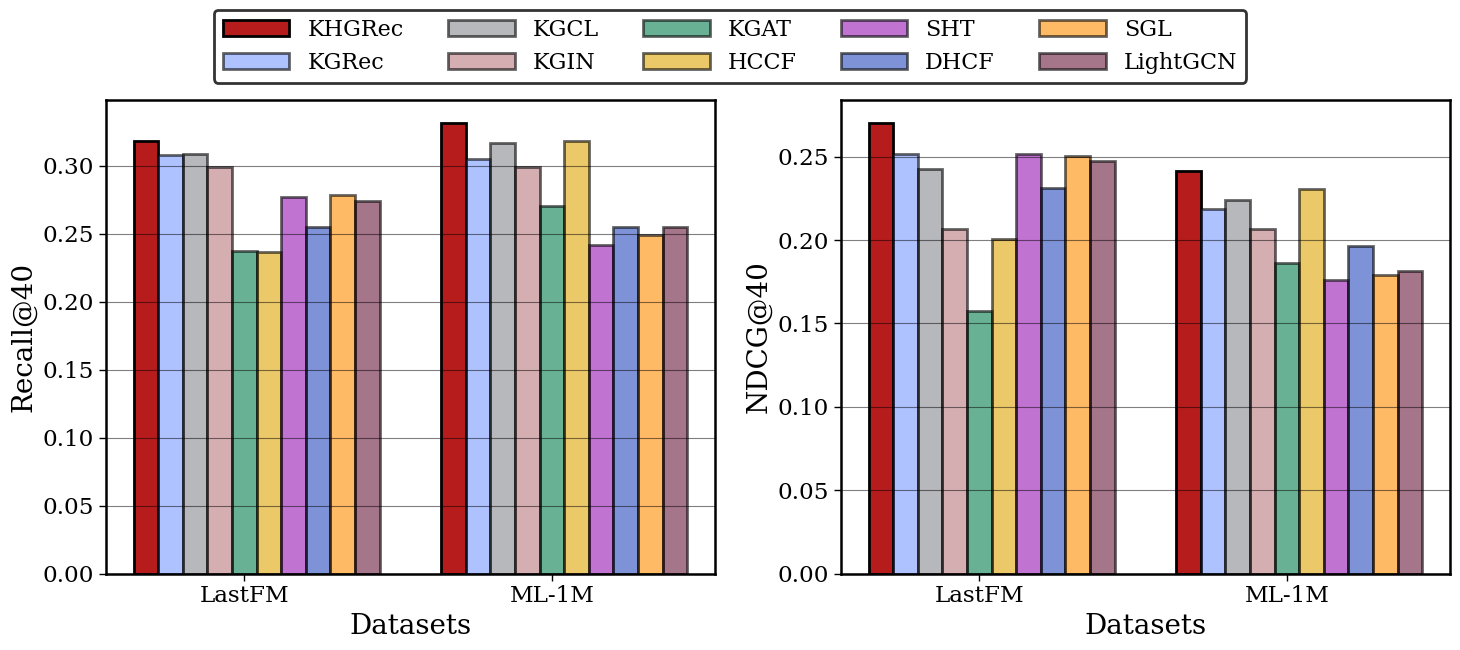

In [73]:
colors = ["#6a1a3d",  "#ff8c00" , "#284cbd", "#9816b5", "#dea404", "#067d4d", "#BA797D", "#88898f", "#789aff", "#b71c1c"]

data_recall = {
    'LastFM': {'LightGCN': 0.2744, 'SGL': 0.2783, 'DHCF': 0.2553, 'SHT': 0.2773, 'HCCF': 0.2365, 'KGAT': 0.2372, 'KGIN': 0.2989, 'KGCL': 0.3089, 'KGRec': 0.3082, 'KHGRec': 0.31803},
    'ML-1M': {'LightGCN': 0.2548, 'SGL': 0.2494, 'DHCF': 0.2553, 'SHT': 0.242, 'HCCF': 0.3183, 'KGAT': 0.2707, 'KGIN': 0.2989, 'KGCL': 0.3165, 'KGRec': 0.3053, 'KHGRec': 0.3319}
}

data_ndcg = {
    'LastFM': {'LightGCN': 0.2472, 'SGL': 0.2502, 'DHCF': 0.2311, 'SHT': 0.2517, 'HCCF': 0.2008, 'KGAT': 0.1574, 'KGIN': 0.2064, 'KGCL': 0.2424, 'KGRec': 0.2514, 'KHGRec': 0.2705},
    'ML-1M': {'LightGCN': 0.1813, 'SGL': 0.1788, 'DHCF': 0.1963, 'SHT': 0.176, 'HCCF': 0.2309, 'KGAT': 0.1865, 'KGIN': 0.2064, 'KGCL': 0.2243, 'KGRec': 0.2187, 'KHGRec': 0.2412}
}

labels = list(data_recall.keys())
models = list(data_recall[labels[0]].keys())
num_models = len(models)

x = np.arange(len(labels))  # the label locations
width = 0.8 / num_models  # the width of the bars

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 6)

# Add bars for each model for each dataset
for i in range(num_models):
    k = num_models - i -1
    model = models[k]
    model_data = [data_recall[label][model] for label in labels]
    if k == 9:
      rects = ax1.bar(x - 0.4 + width/2 + i*width, model_data, width, label=model, color=colors[k], edgecolor='black', alpha=1, align='edge', linewidth=2)
    else:
      rects = ax1.bar(x - 0.4 + width/2 + i*width, model_data, width, label=model, color=colors[k], edgecolor='black', alpha=0.6, align='edge', linewidth=2)

ax1.set_ylabel('Recall@40')
ax1.set_xlabel('Datasets')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

# Add bars for each model for each dataset
for i in range(num_models):
    k = num_models - i -1
    model = models[k]
    model_data = [data_ndcg[label][model] for label in labels]
    if k == 9:
      rects = ax2.bar(x - 0.4 + width/2 + i*width, model_data, width, label=model, color=colors[k], edgecolor='black', alpha=1, align='edge', linewidth=2)
    else:
      rects = ax2.bar(x - 0.4 + width/2 + i*width, model_data, width, label=model, color=colors[k], edgecolor='black', alpha=0.6, align='edge', linewidth=2)

ax2.set_ylabel('NDCG@40')
ax2.set_xlabel('Datasets')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)

# Add grid
ax1.grid(axis='y', linewidth=0.8, alpha=0.3)
ax2.grid(axis='y', linewidth=0.8, alpha=0.3)

# Add legend to the bottom of the figure
handles, labels = ax1.get_legend_handles_labels()
legend = fig.legend(handles, labels,  loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=5, edgecolor='black')

# Add border to the legend
legend.get_frame().set_linewidth(2)

ax1.tick_params(direction='out', length=5, width=1, colors='black', grid_color='black', grid_alpha=0.5)
ax2.tick_params(direction='out', length=5, width=1, colors='black', grid_color='black', grid_alpha=0.5)


ax1.grid( which='minor', color='black', linestyle='dashed', alpha=0.1)
ax2.grid( which='minor', color='black', linestyle='dashed', alpha=0.1)
fig.tight_layout()

plt.show()


In [68]:
fig.savefig("coldstart.pdf", format="pdf", bbox_inches="tight")

In [ ]:
# Assuming your data is in the following format

colors = ["#ff1493", "#8b00ff", "#ff8c00", "#0073ff", "#c0cbff", "#ffc0cb", "#BA797D", "#E0B0FF", "#DE5D83", "#00ffff", "#20B2AA"]

data_recall = {
    'LastFM': {'LightGCN': 0.2744, 'SGL': 0.2783, 'DHCF': 0.2553, 'SHT': 0.2773, 'HCCF': 0.2365, 'KGAT': 0.2372, 'KGIN': 0.2989, 'KGCL': 0.3089, 'KGRec': 0.3082, 'KHGRec': 0.31803},
    'ML-1M': {'LightGCN': 0.2548, 'SGL': 0.2494, 'DHCF': 0.2553, 'SHT': 0.242, 'HCCF': 0.3183, 'KGAT': 0.2707, 'KGIN': 0.2989, 'KGCL': 0.3165, 'KGRec': 0.3053, 'KHGRec': 0.3319}
}

data_ndcg = {
    'LastFM': {'LightGCN': 0.2472, 'SGL': 0.2502, 'DHCF': 0.2311, 'SHT': 0.2517, 'HCCF': 0.2008, 'KGAT': 0.1574, 'KGIN': 0.2064, 'KGCL': 0.2424, 'KGRec': 0.2514, 'KHGRec': 0.2705},
    'ML-1M': {'LightGCN': 0.1813, 'SGL': 0.1788, 'DHCF': 0.1963, 'SHT': 0.176, 'HCCF': 0.2309, 'KGAT': 0.1865, 'KGIN': 0.2064, 'KGCL': 0.2243, 'KGRec': 0.2187, 'KHGRec': 0.2412}
}

labels = list(data_recall.keys())
models = list(data_recall[labels[0]].keys())
num_models = len(models)

x = np.arange(len(labels))  # the label locations
width = 0.8 / num_models  # the width of the bars

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 6)

# Add bars for each model for each dataset
for i in range(num_models):
    k = num_models - i -1
    model = models[k]
    model_data = [data_recall[label][model] for label in labels]
    rects = ax1.bar(x - 0.4 + width/2 + i*width, model_data, width, label=model, color=colors[k], edgecolor='black')

ax1.set_ylabel('Recall@40')
ax1.set_xlabel('Dataset')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
# ax1.legend()

# Add bars for each model for each dataset
for i in range(num_models):
    k = num_models - i -1
    model = models[k]
    model_data = [data_ndcg[label][model] for label in labels]
    rects = ax2.bar(x - 0.4 + width/2 + i*width, model_data, width, label=model, color=colors[k], edgecolor='black')

ax2.set_ylabel('NDCG@40')
ax2.set_xlabel('Dataset')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)

# Add grid
ax1.grid(axis='y', linewidth=0.8, alpha=0.3)
ax2.grid(axis='y', linewidth=0.8, alpha=0.3)

# Add legend to the bottom of the figure
handles, labels = ax1.get_legend_handles_labels()
legend = fig.legend(handles, labels,  ncols=5)  # Adjusted the legend's location and column count

# Add border to the legend
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(2)

# fig.subplots_adjust(right=1.4)  # adjust the top spacing
fig.tight_layout()

plt.show()
